In [15]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import greycomatrix, greycoprops
from sklearn import metrics
from sklearn.model_selection import cross_val_score


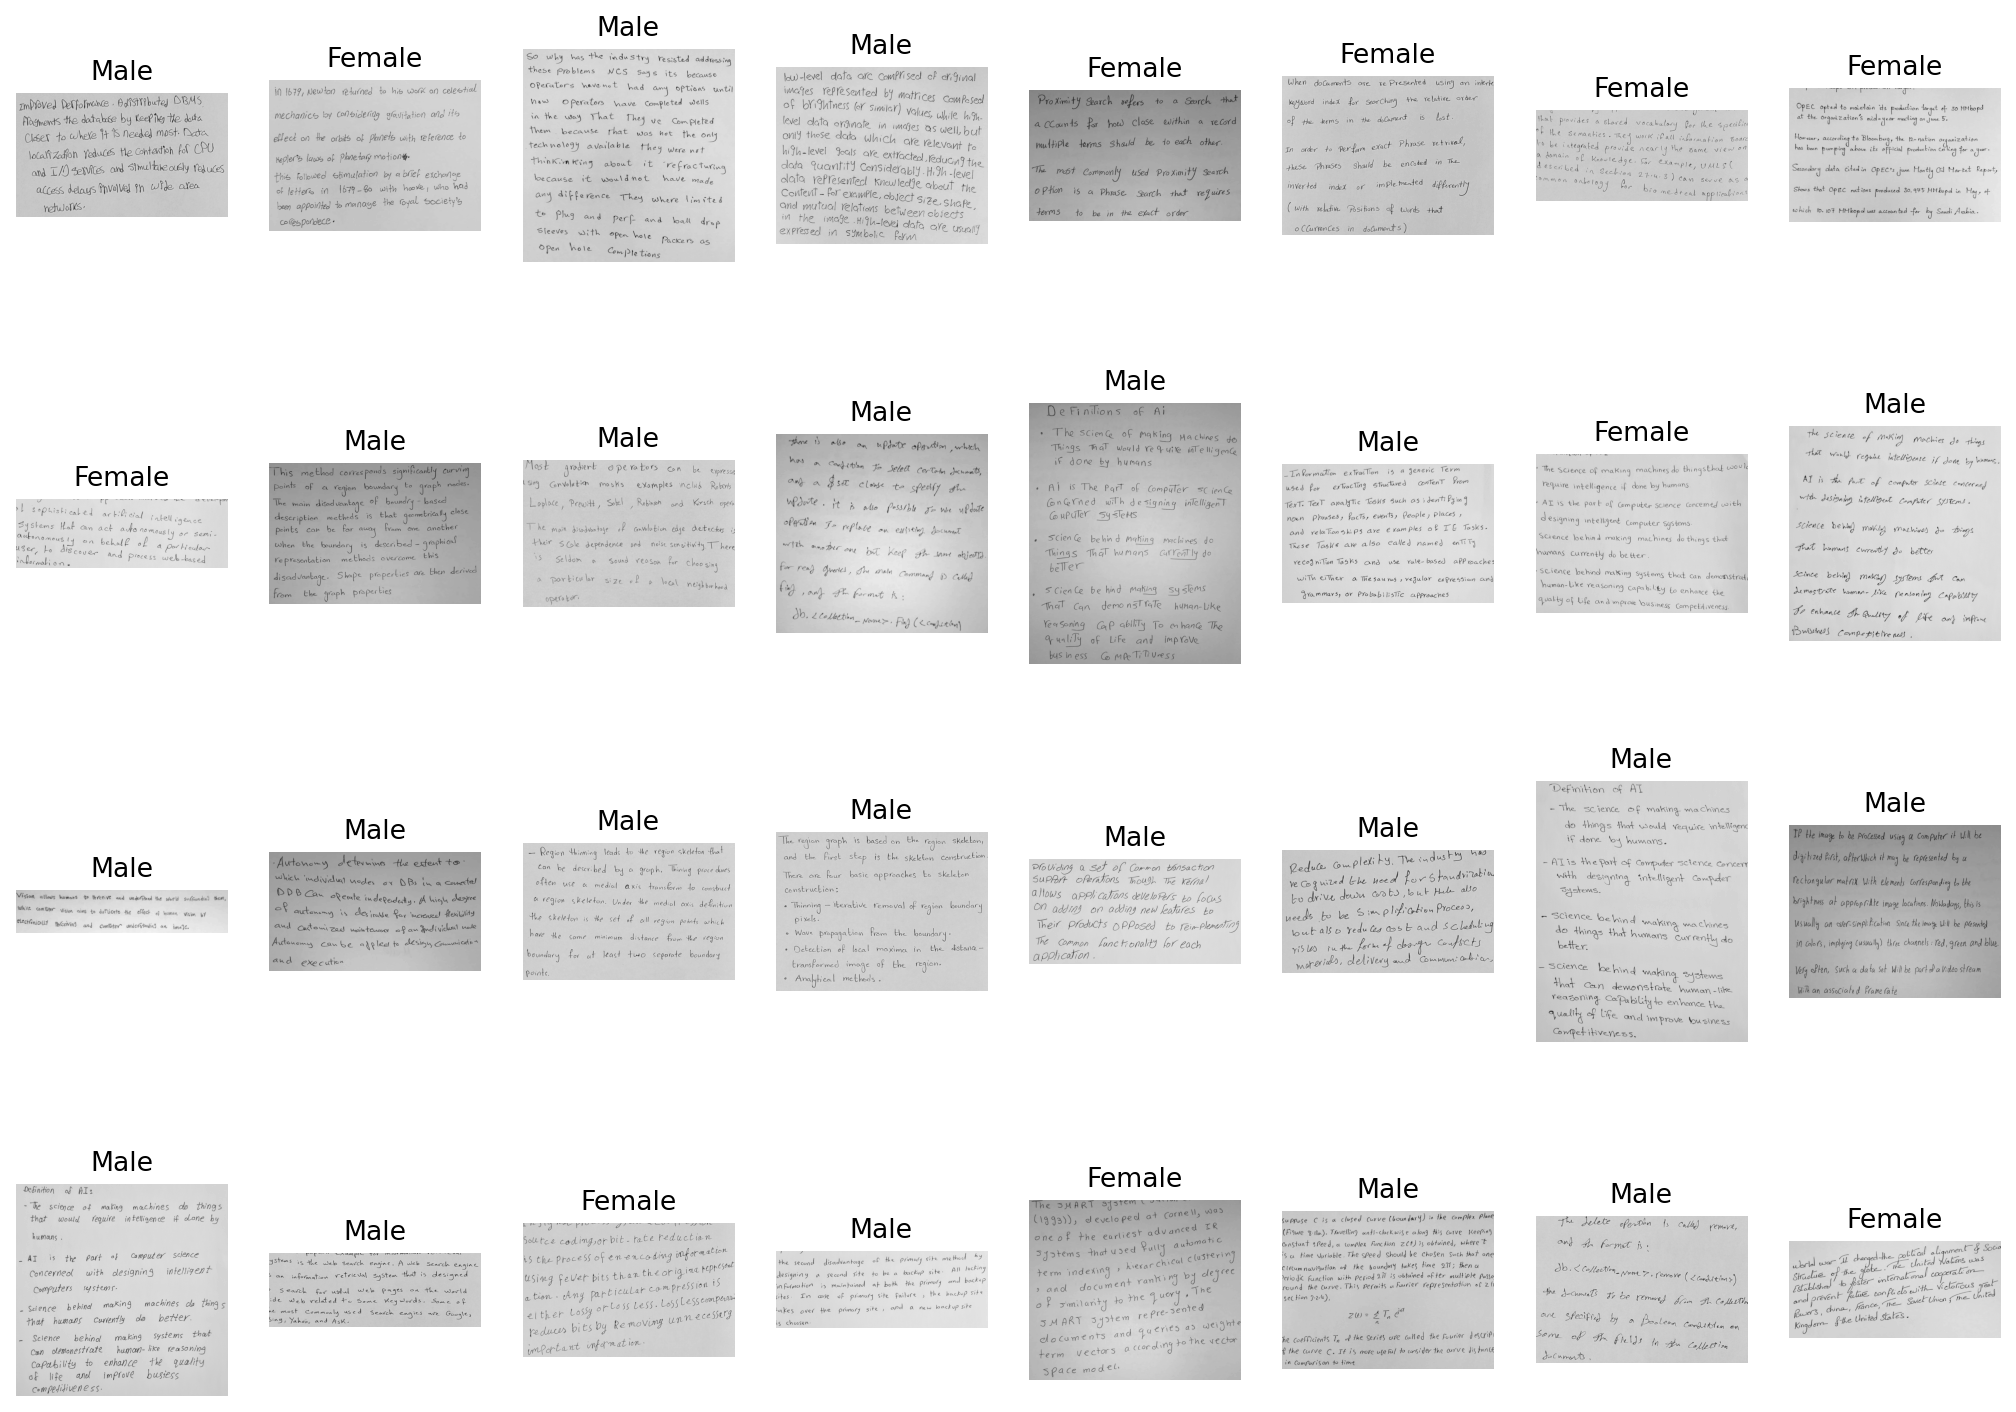

  0%|          | 0/272 [00:00<?, ?it/s]

 length of training set is 272
 length of validation set is 91


100%|██████████| 91/91 [00:24<00:00,  3.68it/s]


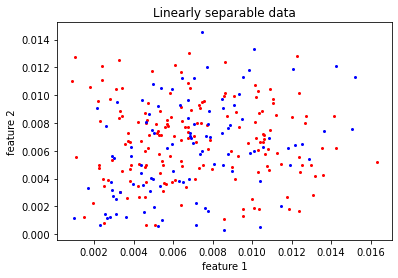

In [16]:
%run ../Features/FindCOLDFeatures.ipynb

## Random Forest - Training

In [17]:
# Boost 100 weak decision trees
model = RandomForestClassifier(n_estimators=100)
#GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

model = model.fit(x_train, y_train)

## Random Forest - Testing

In [18]:
predictions = model.predict(x_test)
acc = {metrics.accuracy_score(y_test, predictions) * 100}
print(f" Model Accuracy is {acc}")

 Model Accuracy is {73.62637362637363}


## The Random Forest - ES Test 

In [19]:
accs=[]
for i in tqdm(range(500)):
	model = RandomForestClassifier(n_estimators=300)
	model = model.fit(x_train, y_train)
	predictions = model.predict(x_test)
	accs.append(metrics.accuracy_score(y_test, predictions) * 100)
print(f" Model Accuracy is {np.mean(accs)}")


100%|██████████| 500/500 [08:09<00:00,  1.02it/s]

 Model Accuracy is 74.40219780219782


## Cross Validation

In [ ]:
x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

accuracies = []

for i in tqdm(range(1, 200)):
   p = np.random.permutation(len(x_data))
   x_data = x_data[p]
   y_data = y_data[p]
   model = RandomForestClassifier(n_estimators=300)
   scores = cross_val_score(model, x_data, y_data, cv=5)
   accuracies.append(scores.mean() * 100)

accuracies = np.array(accuracies)
print(f" Model Accuracy by Cross Validation is {np.mean(accuracies)}%")
